# Logistic Regression as a Neural Network

신경망 프로그래밍의 기본에 대해서 다시 살펴볼 것이다. 사실 신경망을 구현할 때 몇가지 기술들이 있으며 이것들은 매우 중요하다. 예를들어 $m$건의 훈련 데이터(training data)가 있을 때, for-loop를 이용해 데이터 한건 한건 처리할수도 있다. 하지만 보다 나은 접근은 for-loop 없이 전체 데이터를 한꺼번에 처리하는 것이고, 이를 어떻게 할 수 있는지 살펴볼 것이다. 다음으로 일반적인 신경망을 학습시킬 때 순전파(forward propagation)와 역전파(back propagation)를 수행하는데 왜 이런 것들이 필요한지도 살펴볼 것이다. 이해를 돕기 위해 로지스틱 회귀(logistic regression) 모형을 이용한 예제를 이용할 것이다.

### Binary Classification

로지스틱 회귀는 이항 분류(binary classification) 문제를 풀기 위한 방법론이다. 간단한 이항 분류 문제로 아래 그림과 같이 64 x 64의 이미지가 주어지고 이것이 고양이 그림인지(1) 혹은 그렇지 않은지(0)을 분류해야 한다고 해 보자. (앞으로 출력값을 $y$로 표기하기로 한다.)

(아래 예시 그림은 공간이 부족하여 5 x 5 행렬로 그림) 이 예제의 이미지는 각각 적색, 녹색, 파란색의 강도(0~255)를 표현하는 3개의 64 x 64 행렬로 컴퓨터에 저장된다. 입력 데이터를 열 벡터로 표현해보면 우선 적색 행렬의 좌측 상단부터 255, 231, 42, 22, 123, ... , 202를 아래로 나열하고, 그 아래로 녹색 행렬의 숫자들 255, 134, 202, ... 그리고 파란색 행렬의 숫자를 모두 나열한다. 이는 $\mathbb{R}^{12288 \times 1}$의 열 벡터가 될 것이다. ($64 \times 64 \times 3 = 12288$). 이때 입력 피처(input feature) 크기를 $n_x$로 표기하기로 하며, 아래 예에서는 그 값이 12288이다. (종종 간단히 $n$이라 표기하기도 할 것이다)

결국 이 문제에서 하려는 것은 $x$가 주어졌을 때 $y$를 맞추는 것이다.

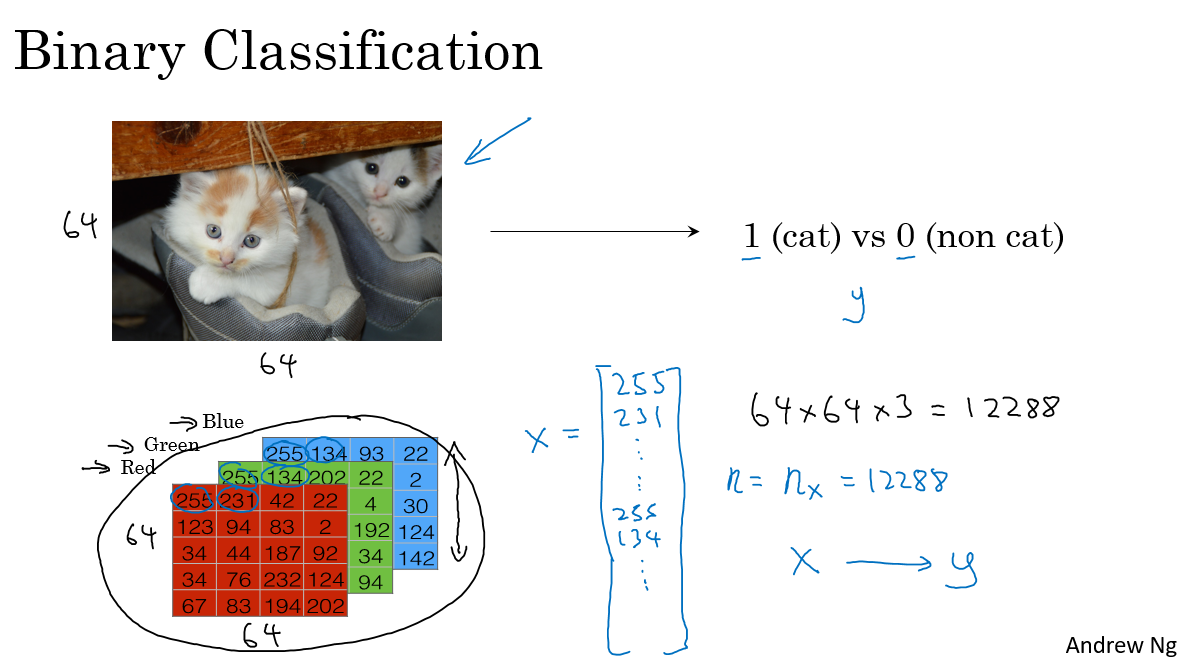

###### 표기법

- 훈련 데이터 한건은 $(x, y)$의 쌍이며, $x$는 $x \in \mathbb{R}^{n_x}$의 열-벡터(column vector)이고, $y$는 1 혹은 0의 값을 갖는다.($y \in \{0, 1\}$)
- 훈련 데이터의 건수는 $m$이라 표기할 것이다. 즉 $\left\{(x^{(1)}, y^{(1)}), ~ (x^{(2)}, y^{(2)}), ~ \cdots ~, (x^{(m)}, y^{(m)})\right\}$로 구성된 데이터이다.
- 종종 훈련 데이터의 건수라는 것을 표현하기 위해 $m_{train}$와 같은 표기도 사용할 것이며, 테스트 데이터의 건수는 $m_{test}$로 표기할 것이다.
- 입력 데이터를 행렬로 표현할 때는 $X$로 표기할 것이며, 각 변수가 열-벡터로 $m$개 열이 $X$을 구성하게 된다. 물론 각 데이터 건을 전치된 열-벡터(transposed column vector)로 위에서부터 쌓는 구조로 $X$를 표현할수도 있으나 각 변수를 열-벡터로 표현하면 그 구현이 훨신 수월해진다.
- 출력 데이터는 $m$건의 출력값을 행-벡터($y \in \mathbb{R}^{1\times m}$)로 표현한다. 물론 열-벡터로 표현하는 것도 가능하지만 행-벡터로 표현하는 것이 파이썬 구현을 훨씬 수월하게 하며, 행-벡터로 표현했을 때 파이썬 벡터의 shape값이 (1, m)이 된다.

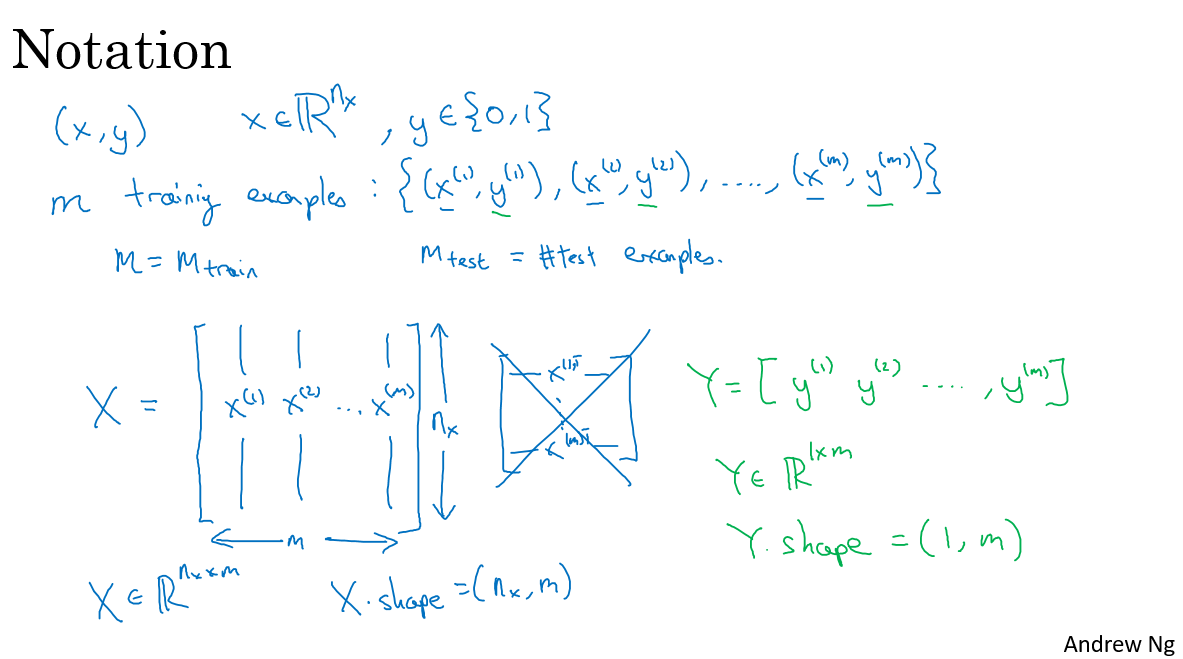.

### Logistic Regression

지도학습 특히 타겟 값이 0vs1과 같이 이항인 경우 유용한 방법 중 하나가 로지스틱 회귀 모형이다. 이런 모형을 통해 타겟 값이 0일지 혹은 1일지를 예측하는 것이 목표이며, 보다 엄밀히는 어떤 입력 데이터 $x$가 주어졌을 때 타겟값이 1일 확률값, $\hat{y}=P(y=1 ~|~ x)$를 얻게 되는 것이다.(혹은 0일 확률) 

이때 $x$는 $n_x$차원 벡터($x\in \mathbb{R}^{n_x}$)이고      
모형의 모수(parameter)  $b$와 $w$는 각각 실수($b \in \mathbb{R})$와 $n_x$차원 벡터($w\in \mathbb{R}^{n_x}$)이다.

로지스틱 회귀모형은 $\hat{y}=\sigma(w^Tx + b)$의 형태로 입력과 출력의 관계를 표현한다. 여기서 $\sigma$는 sigmoid 함수를 의미하며 아래와 같이 정의되며 $z$값이 커질수록 1에 가까운 출력값을, 반대로 $z$값이 작아질수록 0에 가까운 출력값을 내놓는다.
$$\sigma(z) = \frac{1}{1 + \exp^{-z}}, ~ z = w^Tx + b$$

지금까지 설명에서 bias 항 $b$를 별도로 표현해 왔으나, $b$를 $\theta_0$으로 표현하고 값이 1인 $x_0$를 추가하여 $\hat{y}=\sigma(\theta^Tx)$와 같이 표현하는 방법도 있다. 우리 강의에서는 bias 항을 $b$로 표현하는 방식을 따를 것이다.

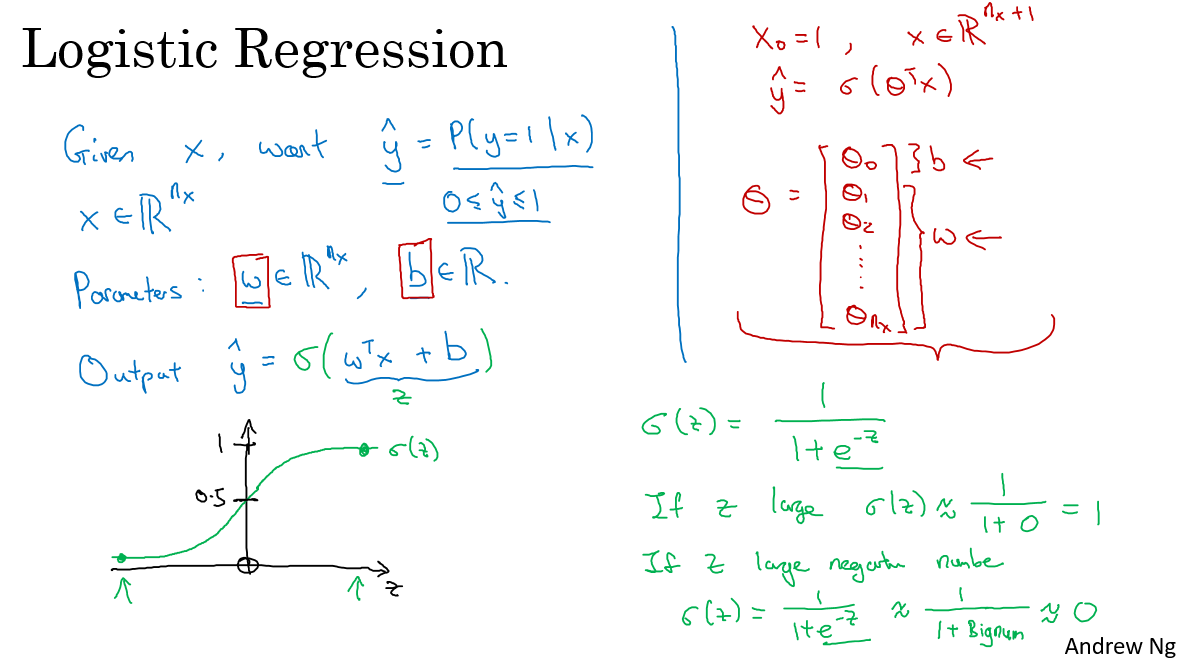

### Logistic Regression Cost Function

$i$번째 데이터 샘플을 $(x^{(i)}, y^{(i)})$라 할 때 로지스틱 회귀모형의 목표는 모형 출력값인 $\hat{y}^{(i)}$가 실제 타겟 값인 $y^{(i)}$와 최대한 가까워지는 것이다. 보다 일반적으로 전체 데이터 $m$건에 대하여 그 차이가 작다면 좋을 것이다. 이를 위해 일반적으로 많이 사용하는 오차 제곱합을 최소화 하는 접근법($\mathrm{argmin}_{w, b}\sum_i^m \frac{1}{2}\left( \hat{y}^{(i)} - y \right)^2$)을 사용할 수도 있을것 같으나, 최소화 하려는 이 함수가 볼록함수(convex function)가 아니라는 문제가 있다. 이 때문에 다른 형태의 오차(loss)함수와 비용(cost) 함수를 정의하여 사용하게 된다.

우선 오차(loss, error) 함수로 $\mathcal{L}(\hat{y}, y) = \frac{1}{2}\left( \hat{y} - y \right)^2$ 대신, $\mathcal{L}(\hat{y}, y) = -\left( y\log\hat{y} + (1-y) \log(1-\hat{y})\right)$를 사용한다. (※ 샘플 하나에 대한 오차를 loss라 부름) 이 함수의 의미를 생각해보면 $y=1$일 때에는 loss 함수가 $\mathcal{L}(\hat{y}, y) = -\log \hat{y}$가 되며 예측값이 1에서 멀어질 수록 큰 오차를 부과하며, 반대로 $y=0$일 때에는 오차 함수가 $\mathcal{L}(\hat{y}, y) = -\log(1- \hat{y})$가 되며 예측값이 0에서 멀어질 수록 큰 오차를 부과함을 알 수 있다.

결국 전체 $m$건의 데이터에 대한 비용(cost) 함수는 아래와 같다.

$$J(w, b) = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) = - \frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log \hat{y}^{(i)} + (1-y^{(i)}) \log(1-\hat{y}^{(i)})\right]$$

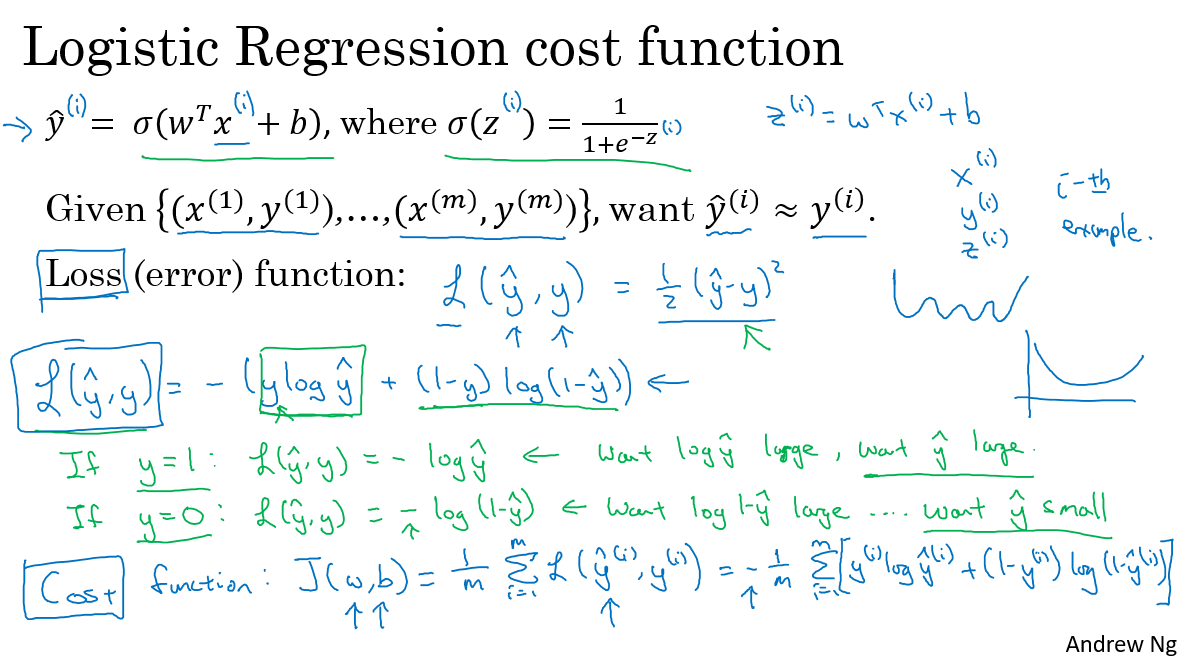

### Gradient Descent

최적화(optimize)할 비용함수 $J(w, b)$를 정의 했었고, 비용함수가 최소값이 되도록 하는 $w$와 $b$를 찾아야 한다. 다행히도 우리가 최적화 하려는 로지스틱 회귀모형의 비용함수는 볼록(convex)함수 이므로 전역 최소값(global minimum)이 단 하나 존재한다. 

전역 최소값을 찾기 위해 우선 $w$와 $b$를 어떤 임의 값으로 초기화 하고, 초기값 $(w, b)$에서 시작하여 가장 경사가 가파른 방향으로 $(w, b)$ 값을 조금식 변화시키는데, 비용함수 값이 임계치 이상 바뀌지 않을 때까지 $(w, b)$ 수정을 반복한다.

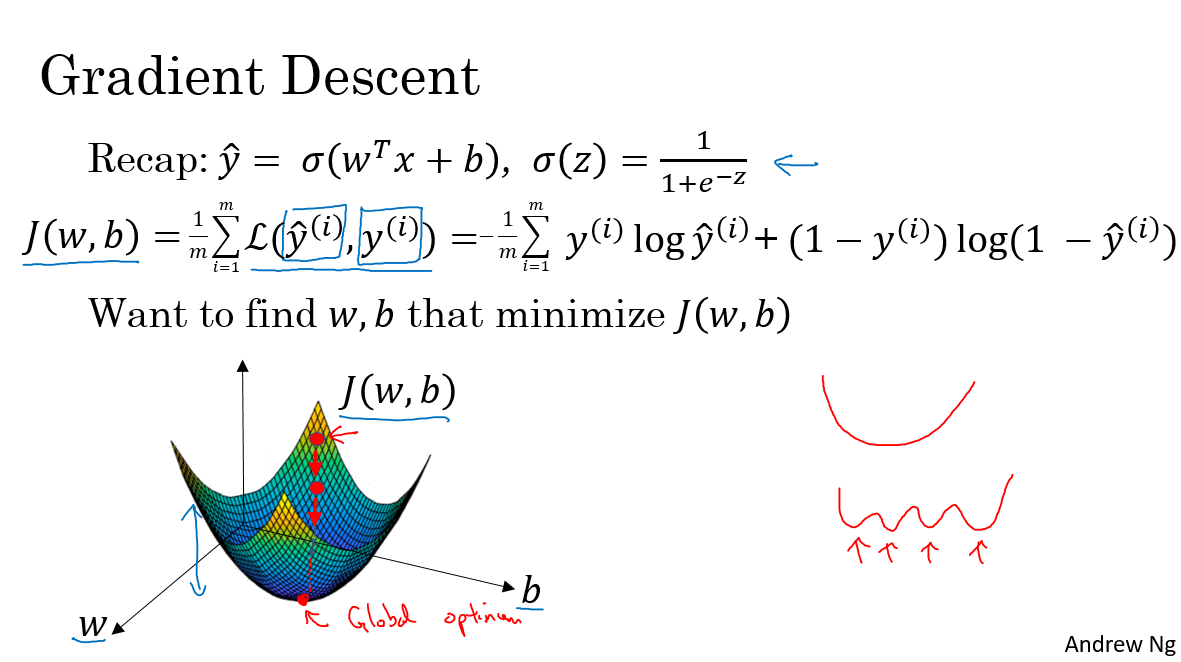

$(w, b)$를 변화시켜가는 과정을 자세히 살펴보자. 설명을 위해 $b$는 없고 $w$만 있다고 가정해보자. 이때 $w$에 따른 비용함수의 값은 아래 그림과 같이 (아래로) 볼록한 함수가 될 것이다. 아래와 같이 $w$ 수정을 반복하며 반복하게 되며 수정의 정도를 표현하기 위해 learning rate $\alpha$를 사용한다.

$$
\begin{align}
&\mathrm{Repeat}  ~ \{ \\
&~~w:=w-\alpha \frac{dJ(w)}{dw} \\
&\} \\
\end{align}
$$

사실 비용 함수에 $w$가 하나만 있지는 않을 것이기 때문에 , 미분을 표현할 때 상미분(ordinary derivative, $dx$)이 아니라 편미분(partial derivative, $\partial x$)으로 표기하는 것이 옳다. 즉 $\frac{\partial J(w, b)}{\partial w_k}$ 로 표기 해야 한다. 

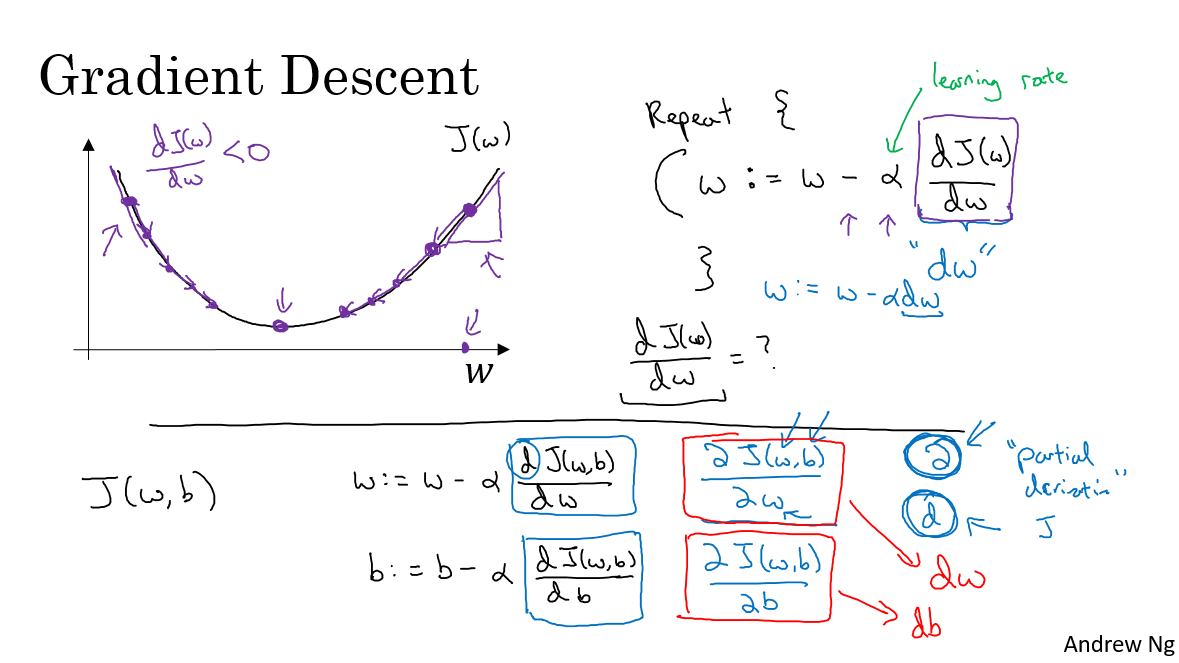

### Derivatives

$f(a) = 3a$라는 함수가 있을 때 $\frac{df(a)}{da}$는 아주 단순하게 특정 $a$값에서 $a$를 아주 조금 변화시켰을 때 $f(a)$는 얼마나 변하는지에 대한 비율이라 할 수 있다. 예를들어 $a=5$일때 $f(a)=15$이고 $a=5.001$일때 $f(a)=15.003$이다. 즉 $a$가 0.001 증가하면 $f(a)$는 0.003 증가한다. 즉 변화율은 $0.003/0.001 = 3$ 이다. $\frac{df(a)}{da}$의 다른 의미로는 어떤 $a$에서 $f(a)$의 기울기라고 생각할수도 있다.

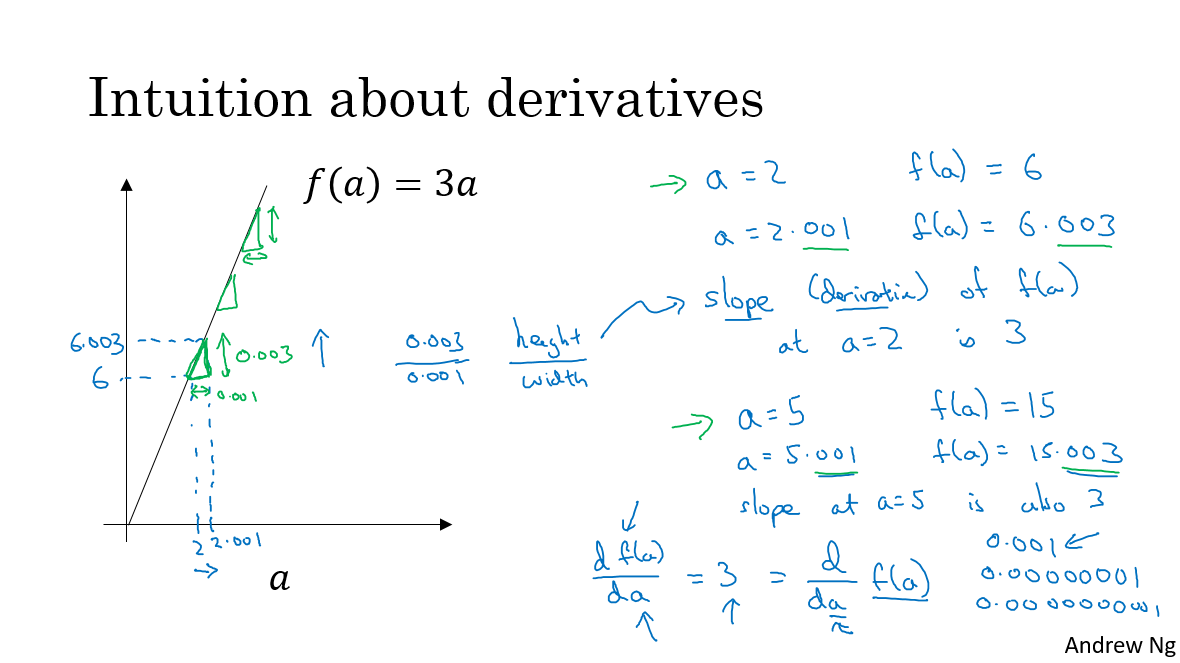

### More Derivative Examples

앞서의 예($f(a) = 3a$)의 경우 서로 다른 $a$에서 함수의 기울기가 변하지 않지만, $f(a)=a^2$의 경우 $a$값에 따라 기울기가 달라진다.

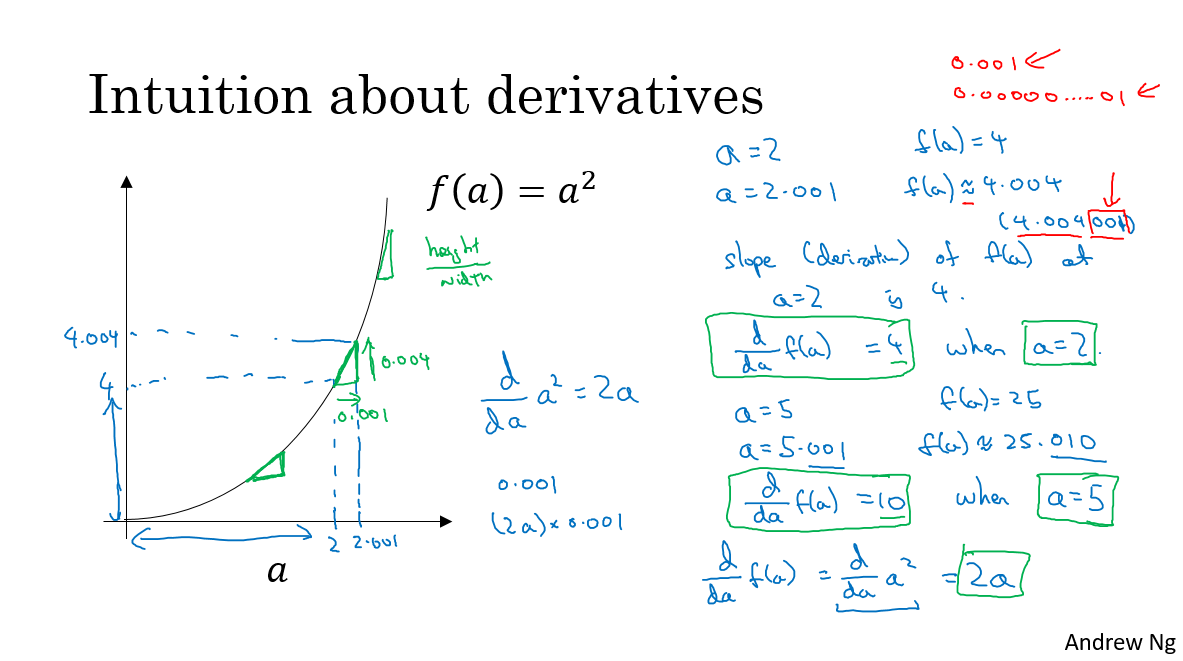

기본적인 몇가지 미분 예는 아래와 같다.
$$
\begin{align}
f(a)=a^2, &~~ \frac{d}{da}f(a) = 2a \\
f(a)=a^3, &~~ \frac{d}{da}f(a) = 3a^2 \\
f(a)=\ln(a), &~~ \frac{d}{da}f(a) = 1/a\\
\end{align}
$$

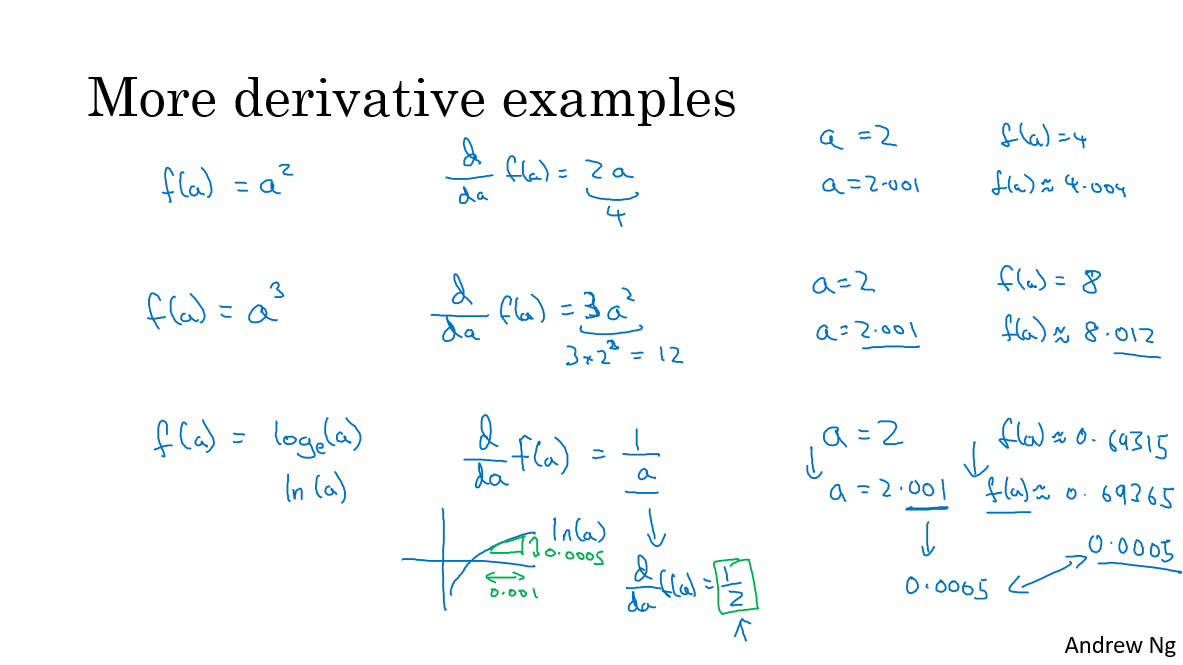

### Computation graph

신경망의 연산은 순전파(forward propagation)에 이은 역전파(backward propagation)로 구성된다. Computation Graph를 통해 신경망 연산이 왜 이렇게 구성되어 있는지 살펴볼 것이다.

설명을 위해 아주 간단한 예시 함수 $J(a, b, c)=3(a + bc)$의 순전파와 역전파 과정을 Computation Graph로 살펴보자. 

우선 순전파 과정은 입력값 $(a, b, c)$를 이용해 $J$를 계산하는 것인제 3단계로 나뉜다. 우선 $b$와 $c$를 이용해 $u=bc$를 계산하고, 두번째로 $a$와 $u$를 이용해 $v=a+u$를 계산하고, 마지막으로 $v$를 이용해 $J=3v$를 계산한다. (아래 그림의 파란색 화살표)

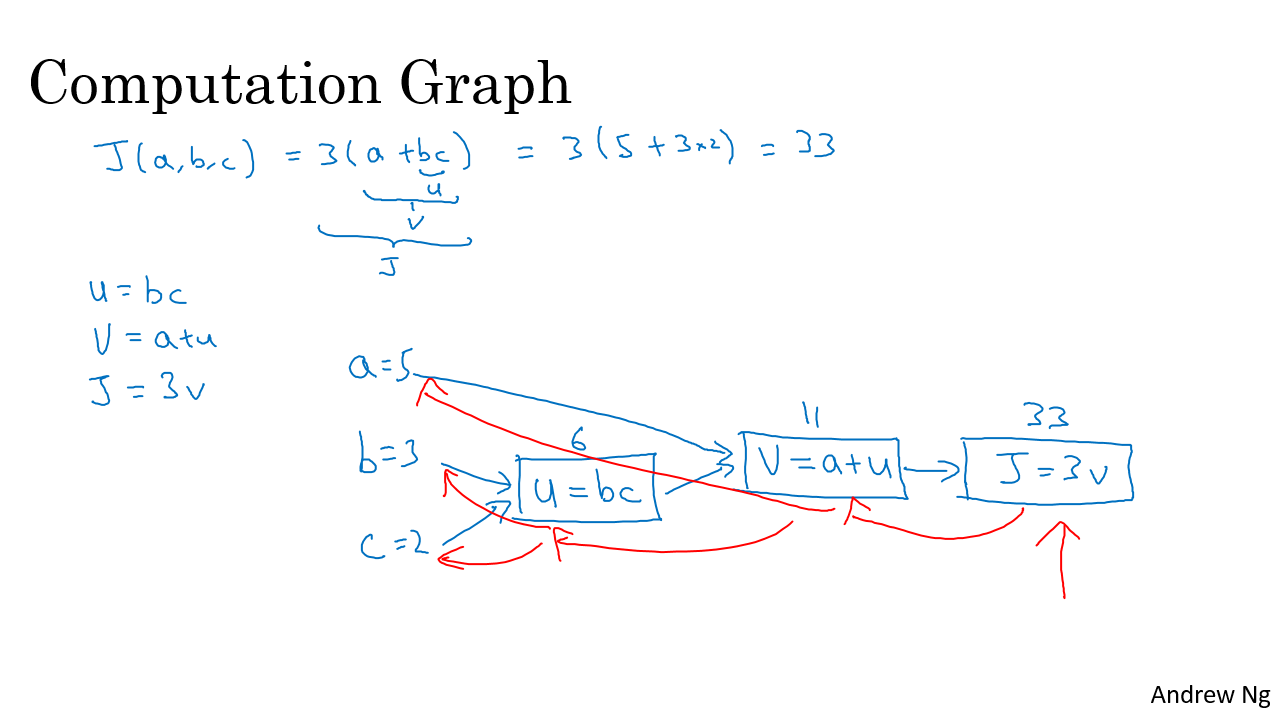

### Derivatives with a Computation Graph

다음으로 역전파(backward propagation)는 $J$에 대한 미분을 구하는 과정인데, Computation Graph로 이 과정을 어떻게 나타낼 수 있는지 살펴본다.

우선 $J=3v$이므로 $\frac{dJ}{dv}$는 $3$이라는 것을 알 수 있다. 두번째로 $\frac{dv}{da}$는 $1$이고, 세번째로 $\frac{dJ}{da}$는 $\frac{dJ}{dv}\frac{dv}{da}$이므로 $3$이고 마찬가지로 $\frac{dJ}{du}=\frac{dJ}{dv}\frac{dv}{du}=3$이다. 

실제 구현에서 대부분의 미분이 $J$를 미분하는 것이므로 앞으로 코드에서는 $\frac{d\mathbf{FinalOutputVar}}{d\mathbf{var}}$에 대한 변수명으로 dvar을 사용할 것이다. 예를들어 $\frac{dJ}{du}$에 대한 변수명으로 'du'를 사용할 것이다.
- dv = 3
- da = 3
- du = 3

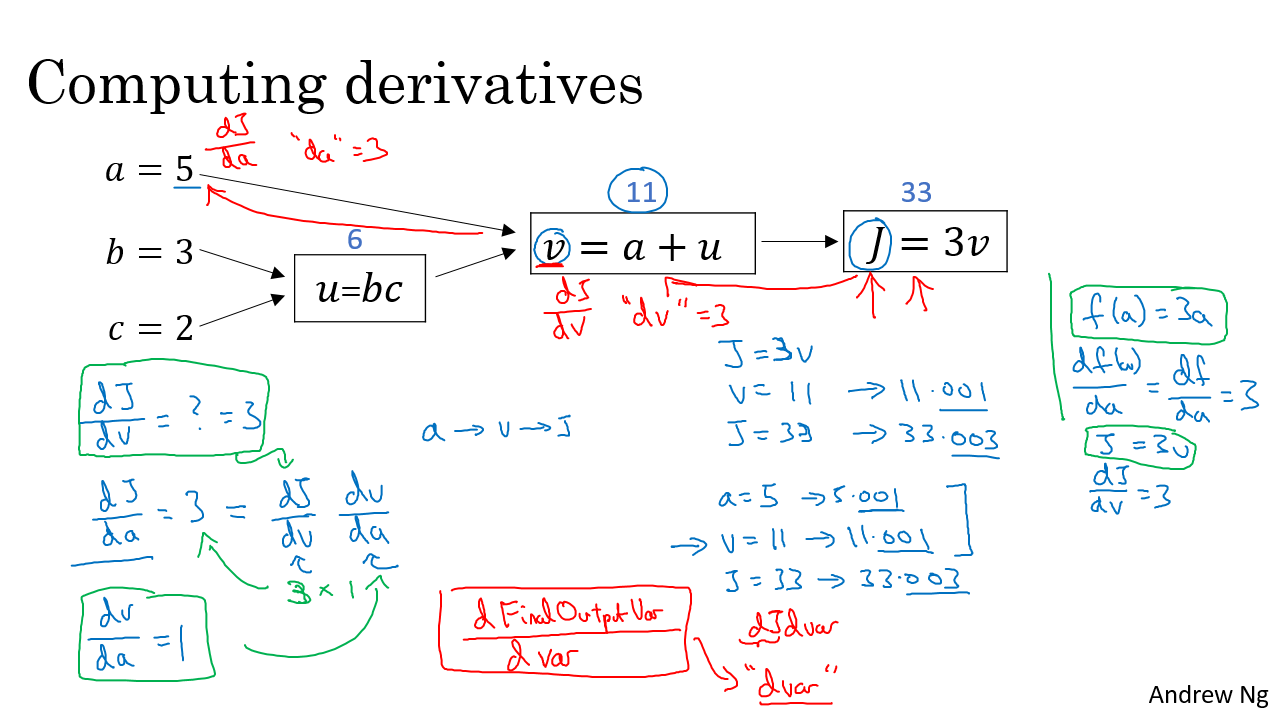

다음으로 $\frac{dJ}{db}=\frac{dJ}{dv}\frac{dv}{db}=3c$인데 이 미분은 $b$가 아닌 다른 변수는 주어진 경우 이므로 그 값이 $6$이다. 마찬가지로 $\frac{dJ}{dc}=\frac{dJ}{dv}\frac{dv}{dc}=3b=9$이다.
- db = 3
- dc = 9

결국 Computation Graph의 역방향을 따라 chain rule을 이어갈 수 있음을 알 수 있다.
(예를들어 $\frac{dJ}{db}=\frac{du}{db}\frac{dv}{du}\frac{dJ}{dv}$이다.)

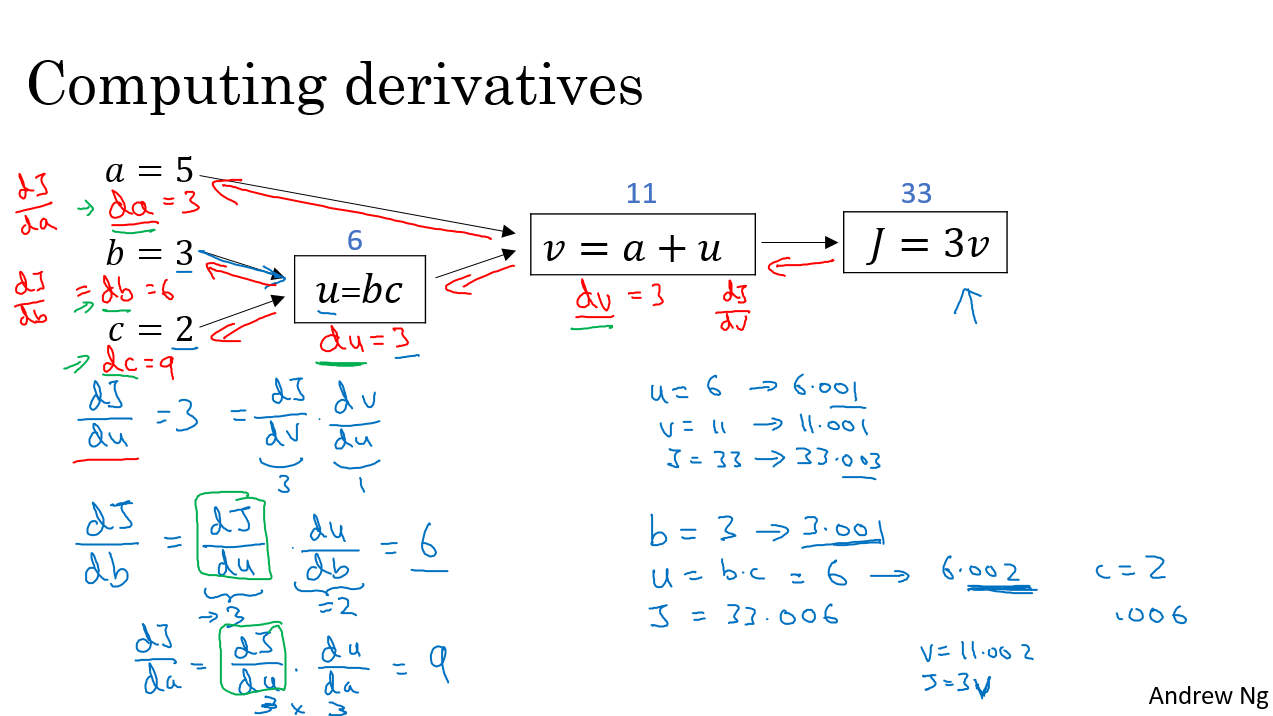

### Logistic Regression Gradient Descent

Computation Graph를 이용해 ($w$가 두개인)로지스틱 회귀모형의 비용함수(cost function)에 대한 미분항들을 구해보자.

한건의 데이터 샘플에 대한 오차 함수(loss, error function), $\mathcal{L}(a, y)$를 구하는 과정은 $(x_1, w_1, x_2, w_2, b)$가 주어졌을 때 $z$, $\hat{y}$, $\mathcal{L}(a, y)$를 차례로 구하는 것으로 나눌 수 있고, 이 과정을 아래 그림과 같은 Computation Graph로 나타낼 수 있다.

결국 주어진 데이터를 이용해 최적의 모형을 찾는 것은 $\mathcal{L}(a, y)$가 줄어들도록 $w_1$과 $w_2$를 변화시키는 것이며 이를 위해서는 $\frac{\mathcal{L}(a,y)}{dw_1}$과 $\frac{\mathcal{L}(a,y)}{dw_2}$를 구해야 한다.


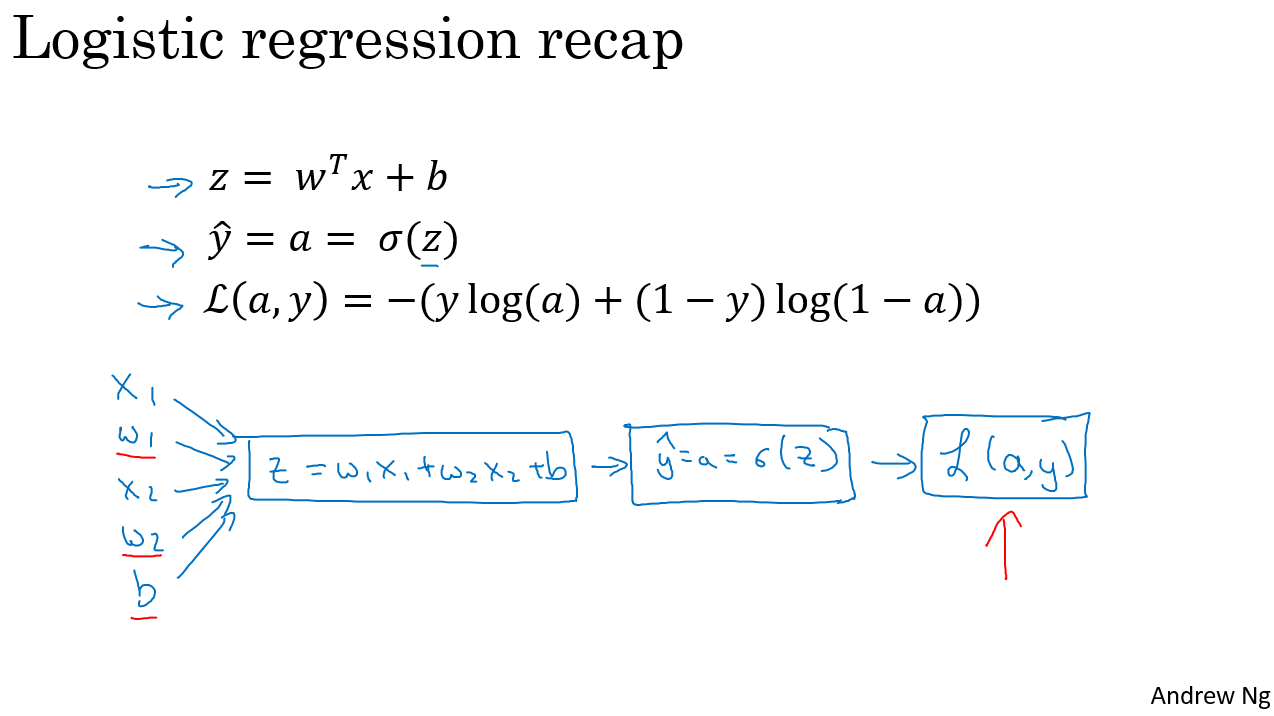

우선 $\mathcal{L}(a,y) = -\left( y\log\hat{y} + (1-y) \log(1-\hat{y})\right)$를 $a$관하여 미분하여 $\frac{\mathcal{L}(a,y)}{da}=-\frac{y}{a} + \frac{1-y}{1-a}$라는 것을 알 수 있고 이것을 'da'라고 표기하기로 한다. 

다음으로 $\frac{d\mathcal{L}(a,y)}{dz}=\frac{d\mathcal{L}(a,y)}{da}\frac{da}{dz} = \left(-\frac{y}{a} + \frac{1-y}{1-a}\right) \cdot a(1-a) = a-y$이고 이것을 'dz'라 표기하기로 한다.

마지막으로  $\frac{d\mathcal{L}(a,y)}{dw_1}=\frac{d\mathcal{L}(a,y)}{da}\frac{da}{dz}\frac{dz}{dw_1} = \frac{d\mathcal{L}(a,y)}{dz}\frac{dz}{dw_1} = \frac{d\mathcal{L}(a,y)}{dz} \cdot x_1$이고 이것을 'dw1'이라 표기할 것이며 $x_1\cdot$'dz'와 같다. 마찬가지로 dw2는 $x_2 \cdot$'dz'이고, 'db'는 $\frac{dz}{db}=1$이므로 'dz'와 같다.($\frac{d\mathcal{L}(a,y)}{db} = \frac{d\mathcal{L}(a,y)}{dz}\frac{dz}{db}$)

Computation Graph에서 이 계산 과정을 살펴보면 $\frac{d\mathcal{L}(a,y)}{dw_1}$을 구하는 것은 단지 (마지막 노드로부터) 노드 [$a=\sigma(z)$]까지 계산된 미분항 'dz'에 $\frac{dz}{dw_1}$을 곱하는 것이다.

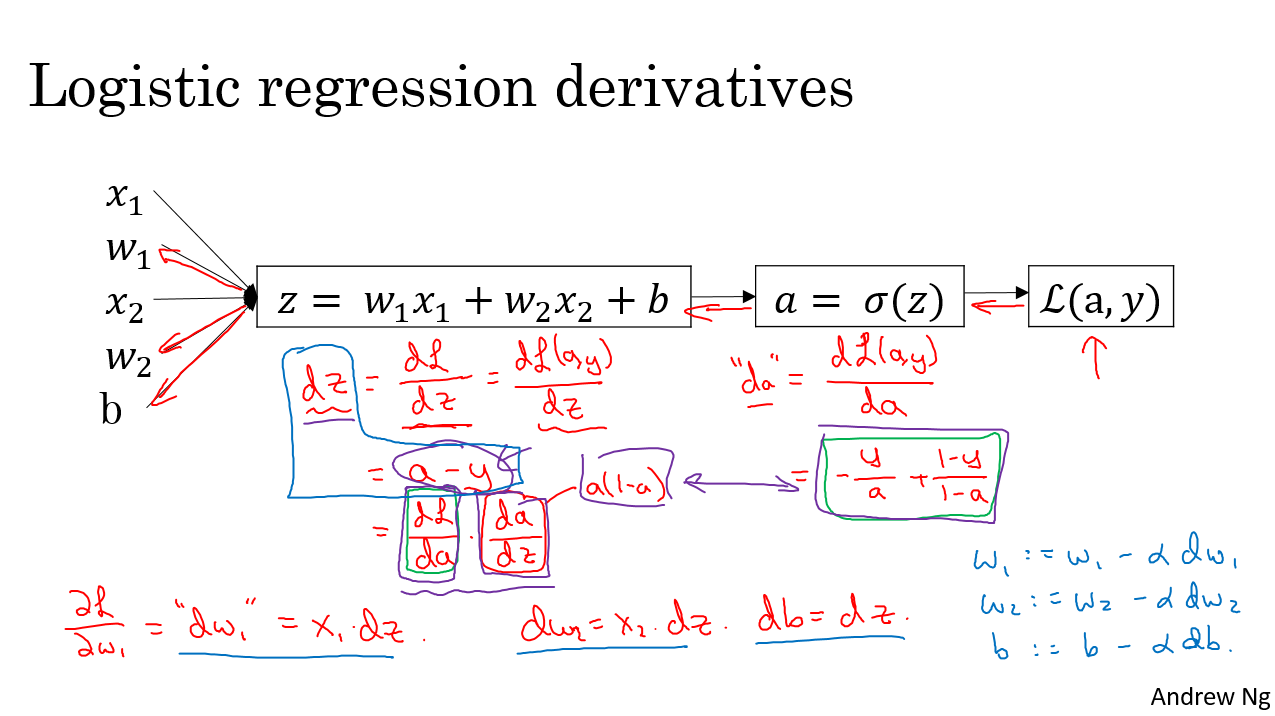

### Gradient Descent on m Examples

$J(w,b)=\frac{1}{m}\sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$이므로, 전체 $m$건의 데이터에 대한 비용-미분항들은 아래와 같다.     
$$\begin{align}
\frac{dJ(w,b)}{dw_1}&=\frac{1}{m}\sum_{i=1}^m \frac{d\mathcal{L}(a^{(i)}, y^{(i)})}{dw_1} \\
\frac{dJ(w,b)}{dw_2}&=\frac{1}{m}\sum_{i=1}^m \frac{d\mathcal{L}(a^{(i)}, y^{(i)})}{dw_2} \\
\frac{dJ(w,b)}{db}&=\frac{1}{m}\sum_{i=1}^m \frac{d\mathcal{L}(a^{(i)}, y^{(i)})}{db} \\
\end{align}$$ 

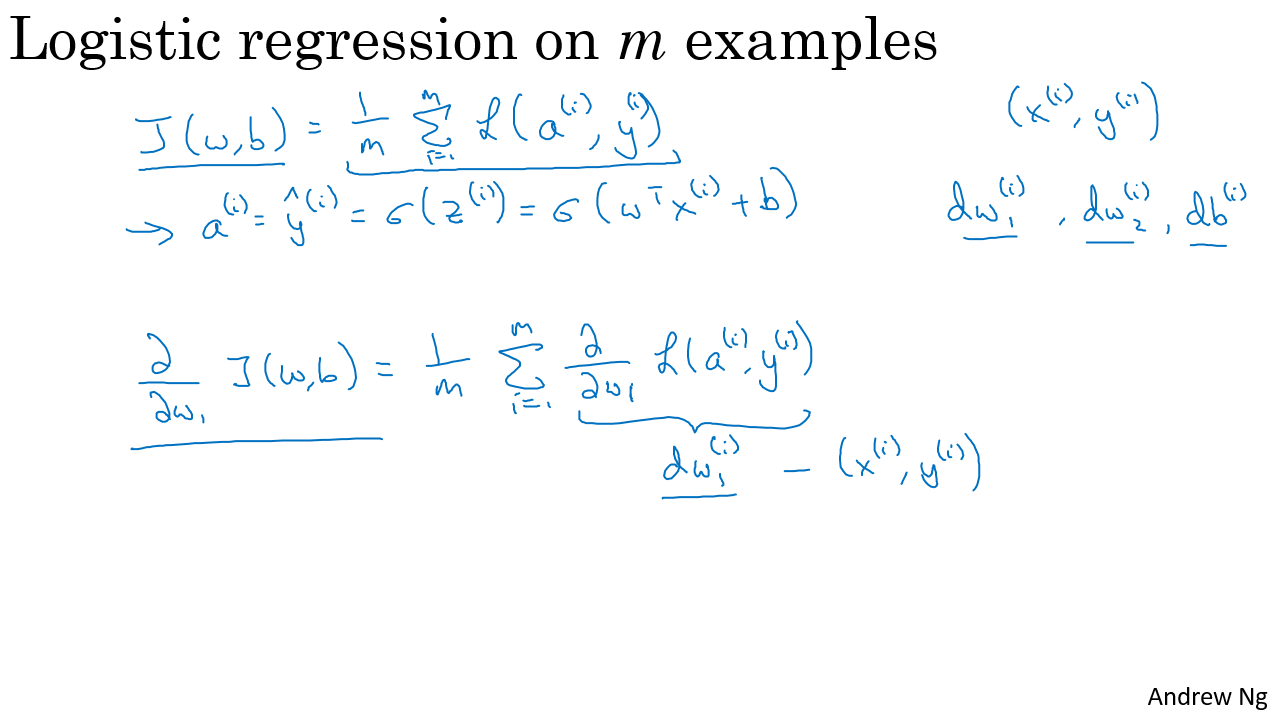

$J(w,b)$, $\frac{dJ(w,b)}{dw_1}$, $\frac{dJ(w,b)}{dw_2}$, $\frac{dJ(w,b)}{db}$를 구하는 구현 로직은 아래와 같다. 

$m$건에 대한 for-loop를 한번 돌고 나서, 계산된 dw1, dw2, db를 이용해 w1, w2, b를 learning rate $\alpha$에 비례하여 업데이트 하게 된다. 이후 for-loop를 돌고 w1, w2, b를 업데이트 하는 과정을 (J의 변화가 임계값 이하 일때까지)반복한다. 

구현 중간에 'dw1', 'dw2'를 각각 구하는 부분($dw_1 += x_1^{(i)}~dz^{(i)}$, $dw_2 += x_2^{(i)}~dz^{(i)}$)이 있는데 이를 벡터연산 $dw += x^{(i)}$으로 바꿀수도 있다. (이런 벡터연산화는 Feature가 매우 많을 경우 더더욱 효과적일 것이다.)

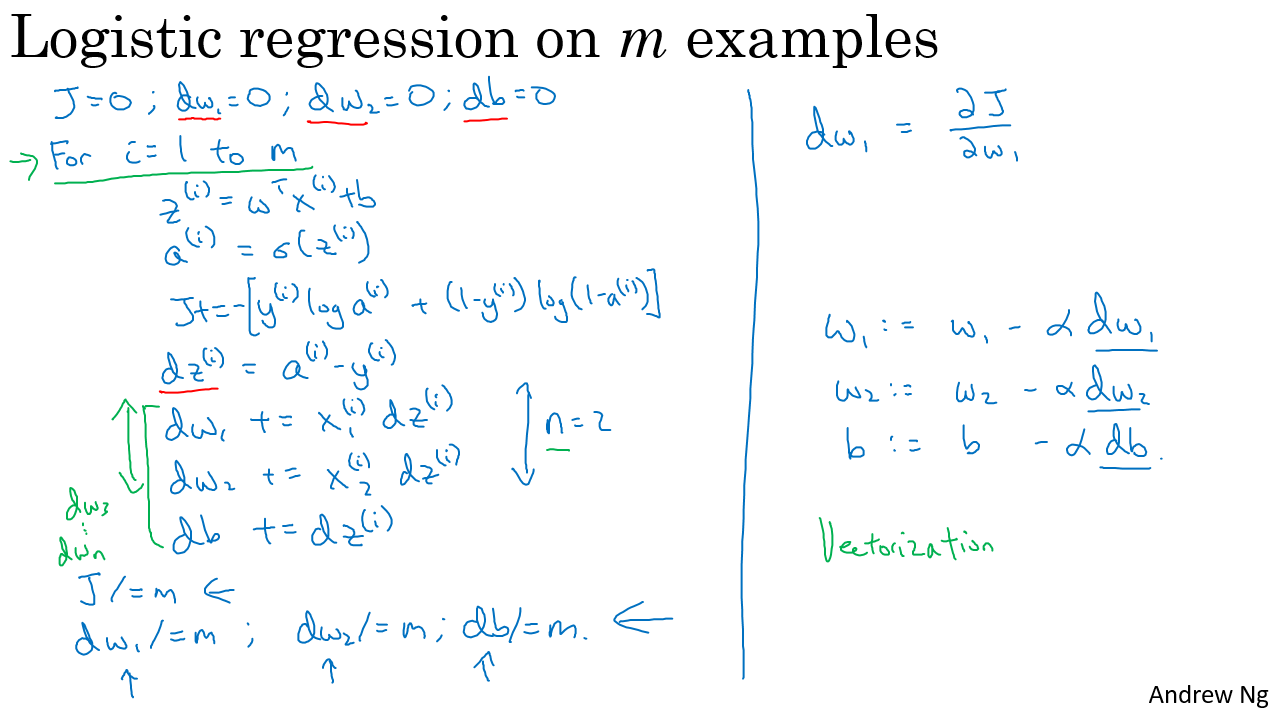

# Python and Vectorization

### Vectorization

벡터 혹은 배열에 대한 연산을 각 원소에 대해 수행하는 것이 아니라, 한번에 명령으로 병렬적으로 동시에 계산하도록 하는 것을 의미한다. 아래 코드에서 확인 할 수 있는 것 처럼 'np.dot(a, b)'는 벡터화되어 연산이 수행되며 그 계산 속도가 벡터화 하지 않은 것에 비해 수십배 빠름을 확인 할 수 있다.

In [8]:
import numpy as np
import time

a = np.random.rand(1000000)
b = np.random.rand(1000000)

tic = time.time()
c = np.dot(a, b)
toc = time.time()

print(c)
print('Vectorized version:', str(1000*(toc-tic)) + 'ms')

c = 0
tic = time.time()
for i in range(100000):
    c += a[i] * b[i]
toc = time.time()

print(c)
print('For loop version: ', str(1000*(toc-tic)) + 'ms')

250062.952668
Vectorized version: 1.0035037994384766ms
24896.7496426
For loop version:  64.67771530151367ms


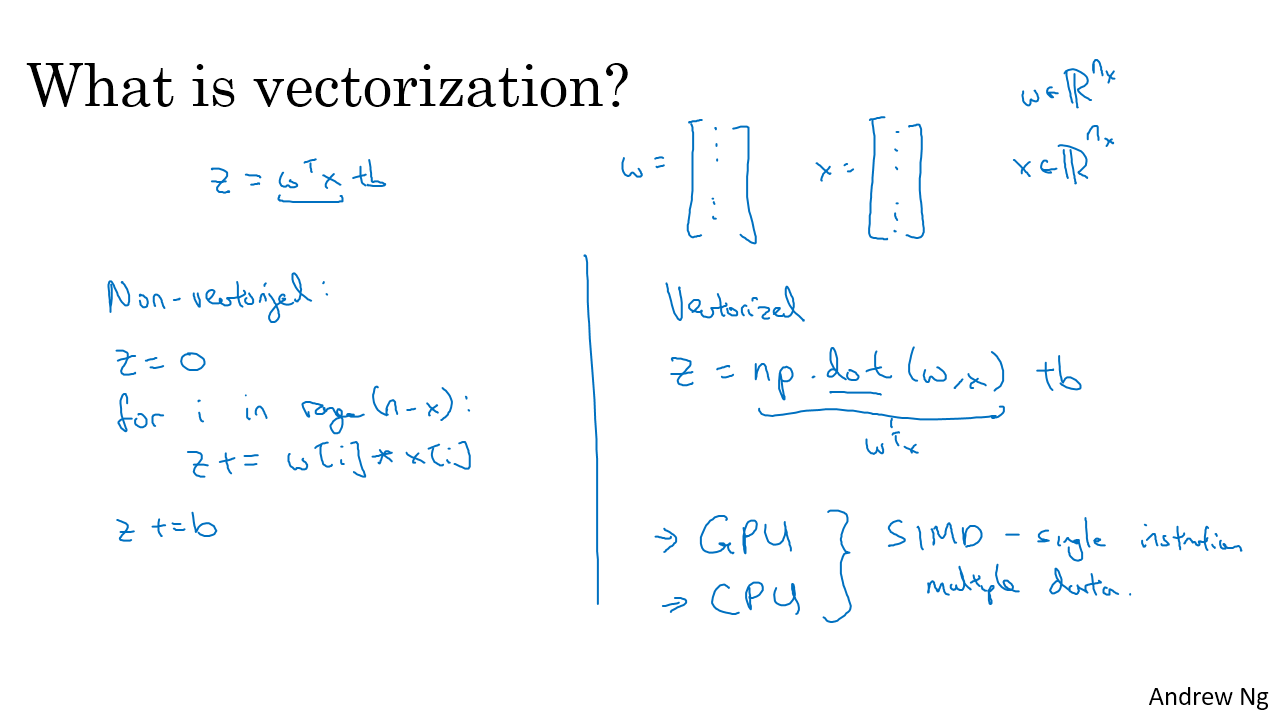

### More Vectorization Examples

m x n차원 행렬 $A$와 m차원 벡터 $v$의 곱을 아래와 같이 for-loop로 계산할수도 있고 벡터화된 np.dot을 이용해 계산할수도 있다.


In [16]:
import numpy as np
import time

n = 2000
m = 3000
A = np.random.random((n, m))
v = np.random.random(m)

u = np.zeros((n,1))

tic = time.time()
for i in range(n):
    for j in range(m):
        u[i] += A[i][j] * v[j]
toc = time.time()
print('For loop version : ', str(1000*(toc-tic)) + 'ms')

tic = time.time()
u = np.dot(A, v)
toc = time.time()
print('Vectorized version:', str(1000*(toc-tic)) + 'ms')

For loop version   :  10768.908023834229ms
Vectorized version: 2.5064945220947266ms


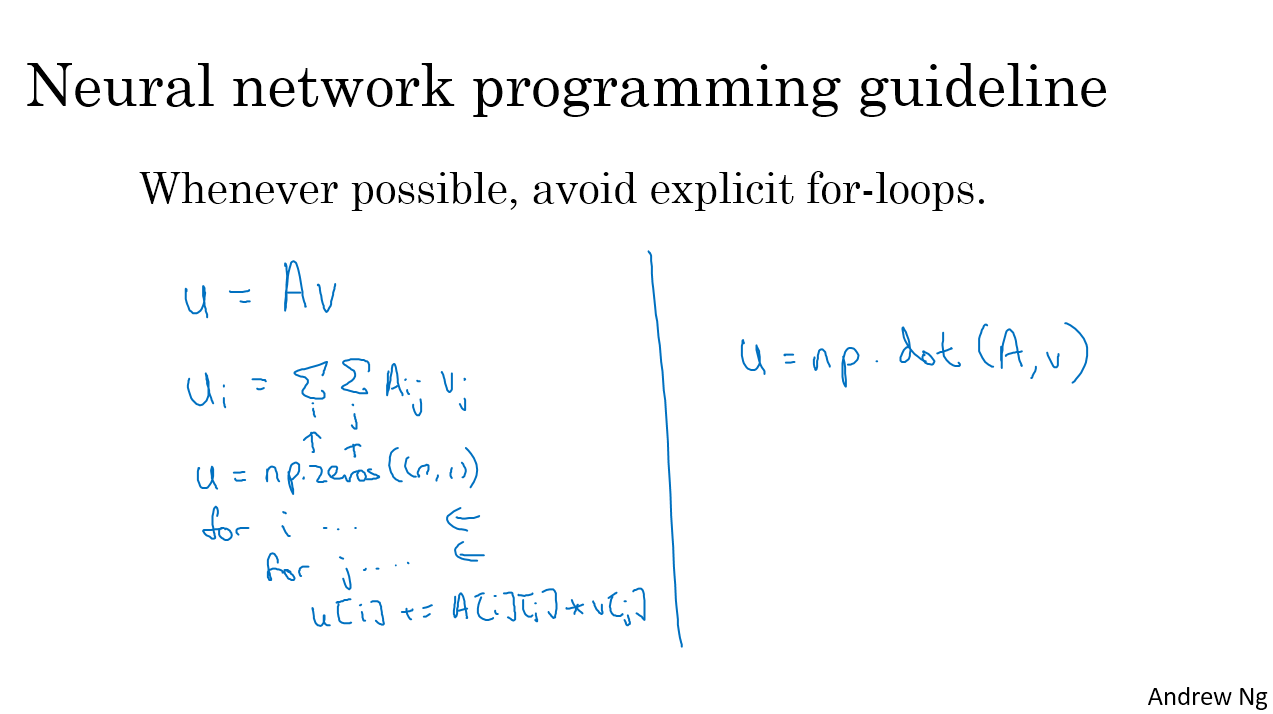

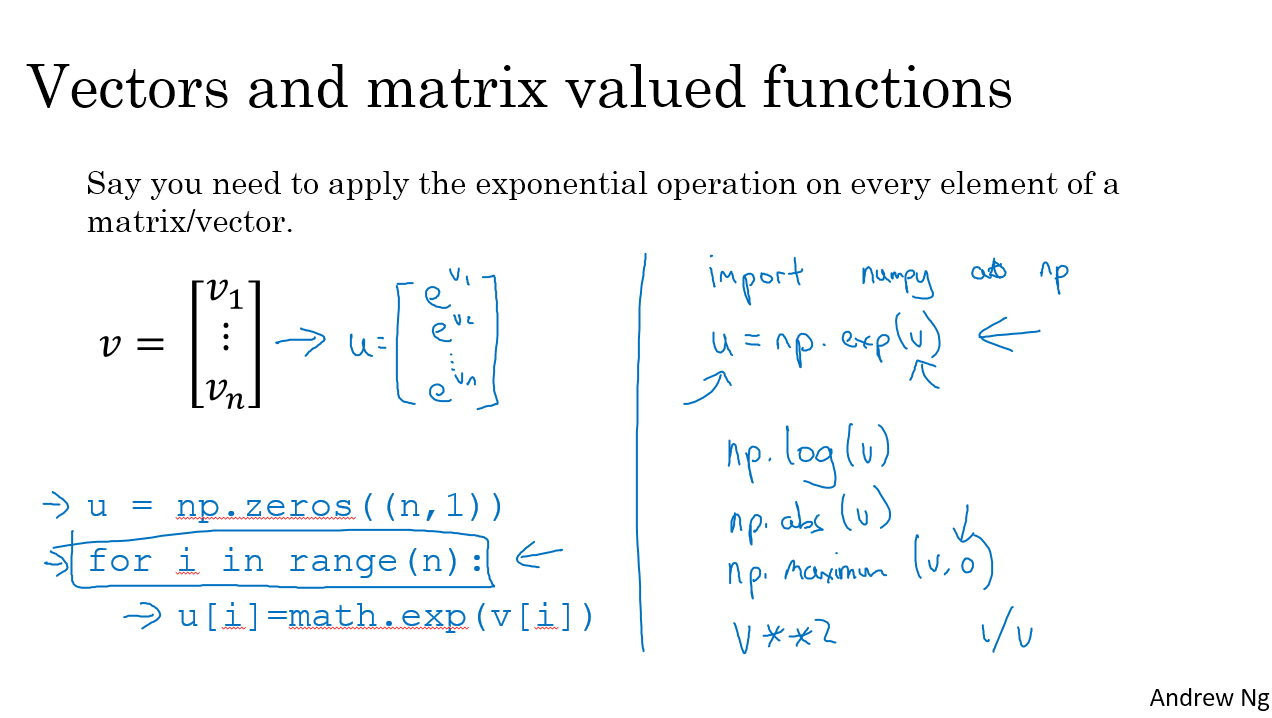

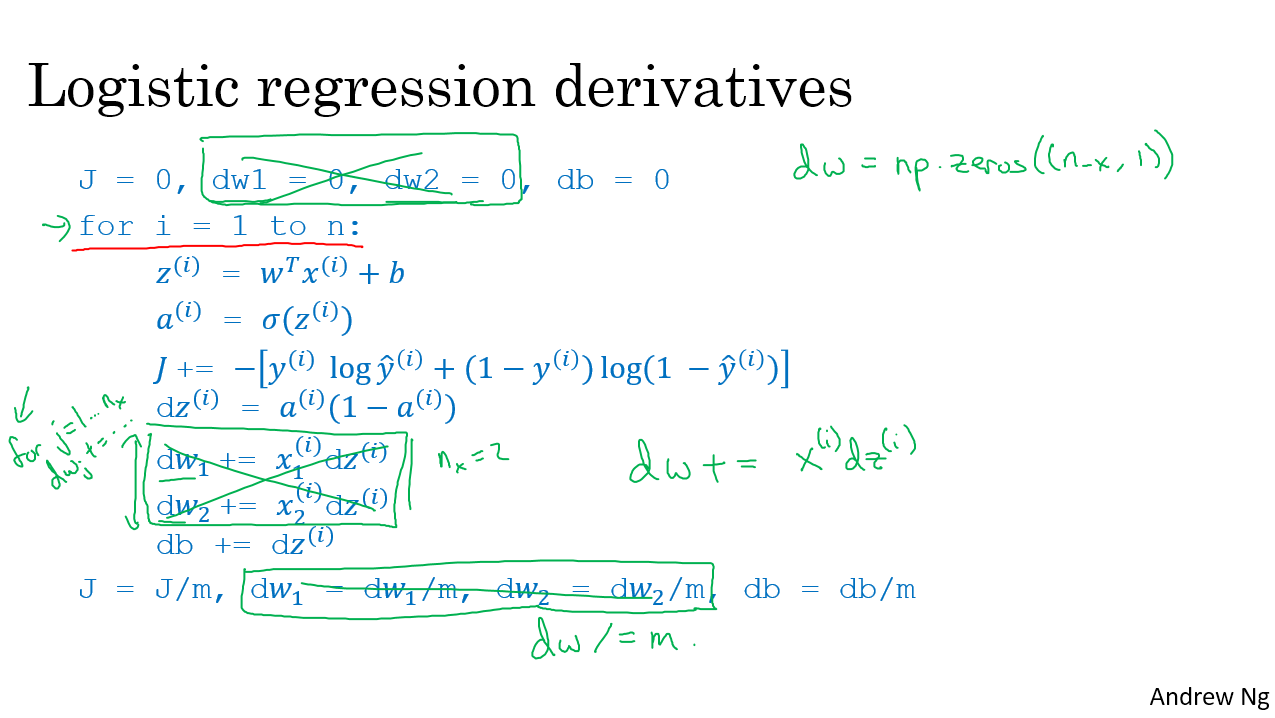

### Vectorizing Logistic Regression

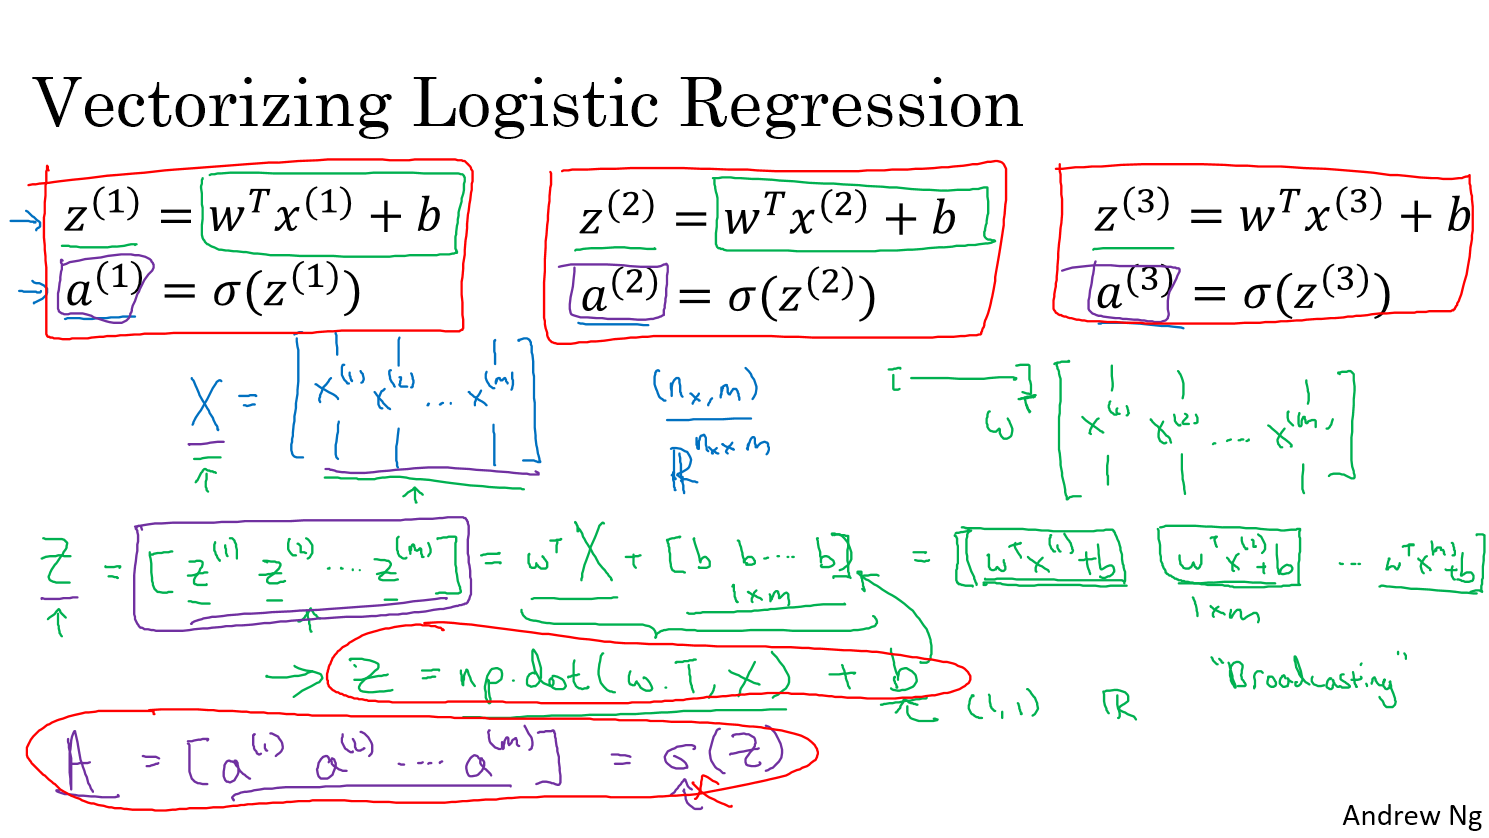

### Vectorizing Logistic Regression's Gradient Output

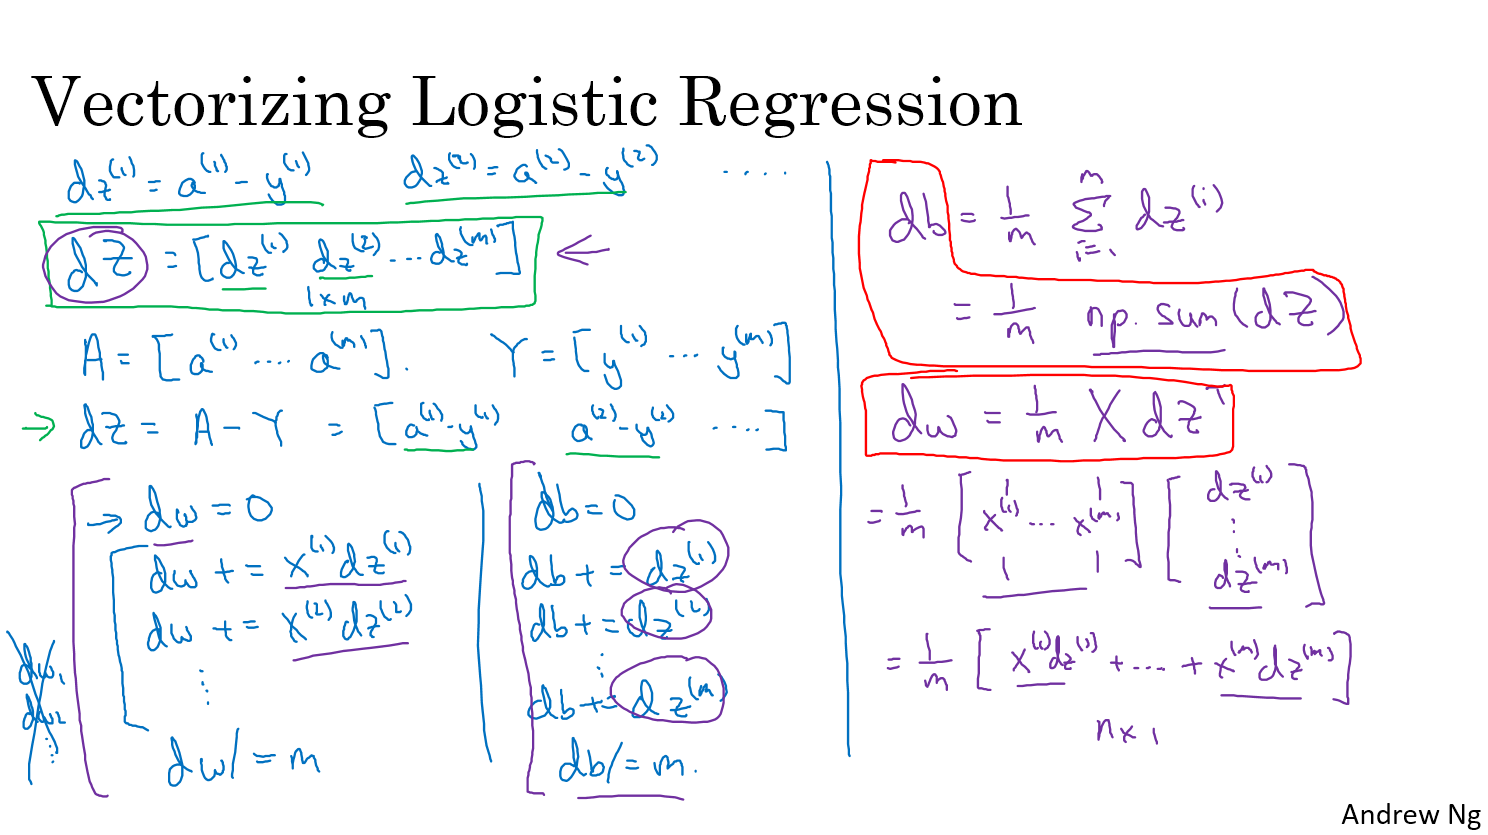

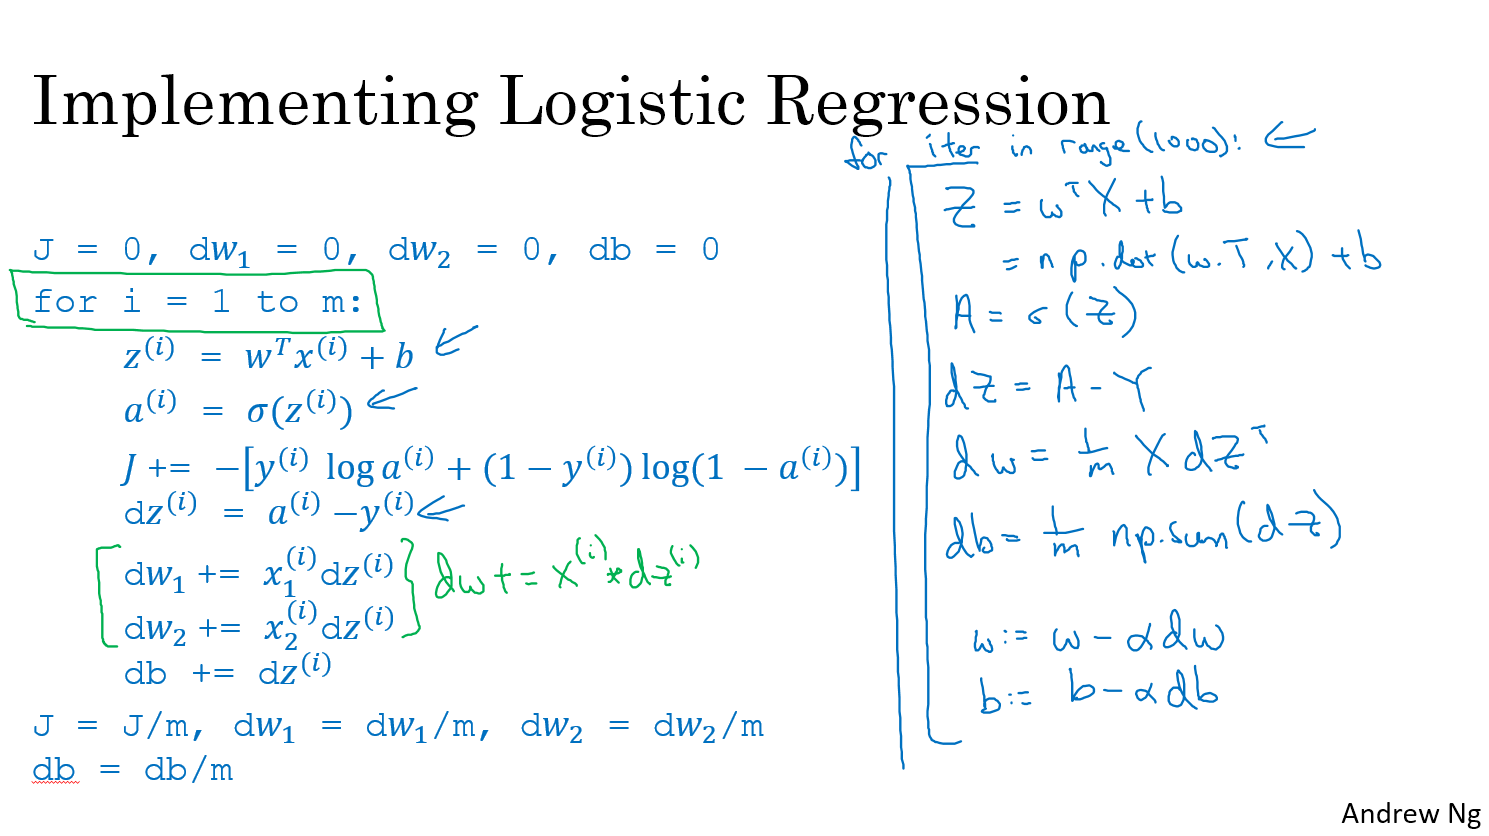

### Broadcasting in Python

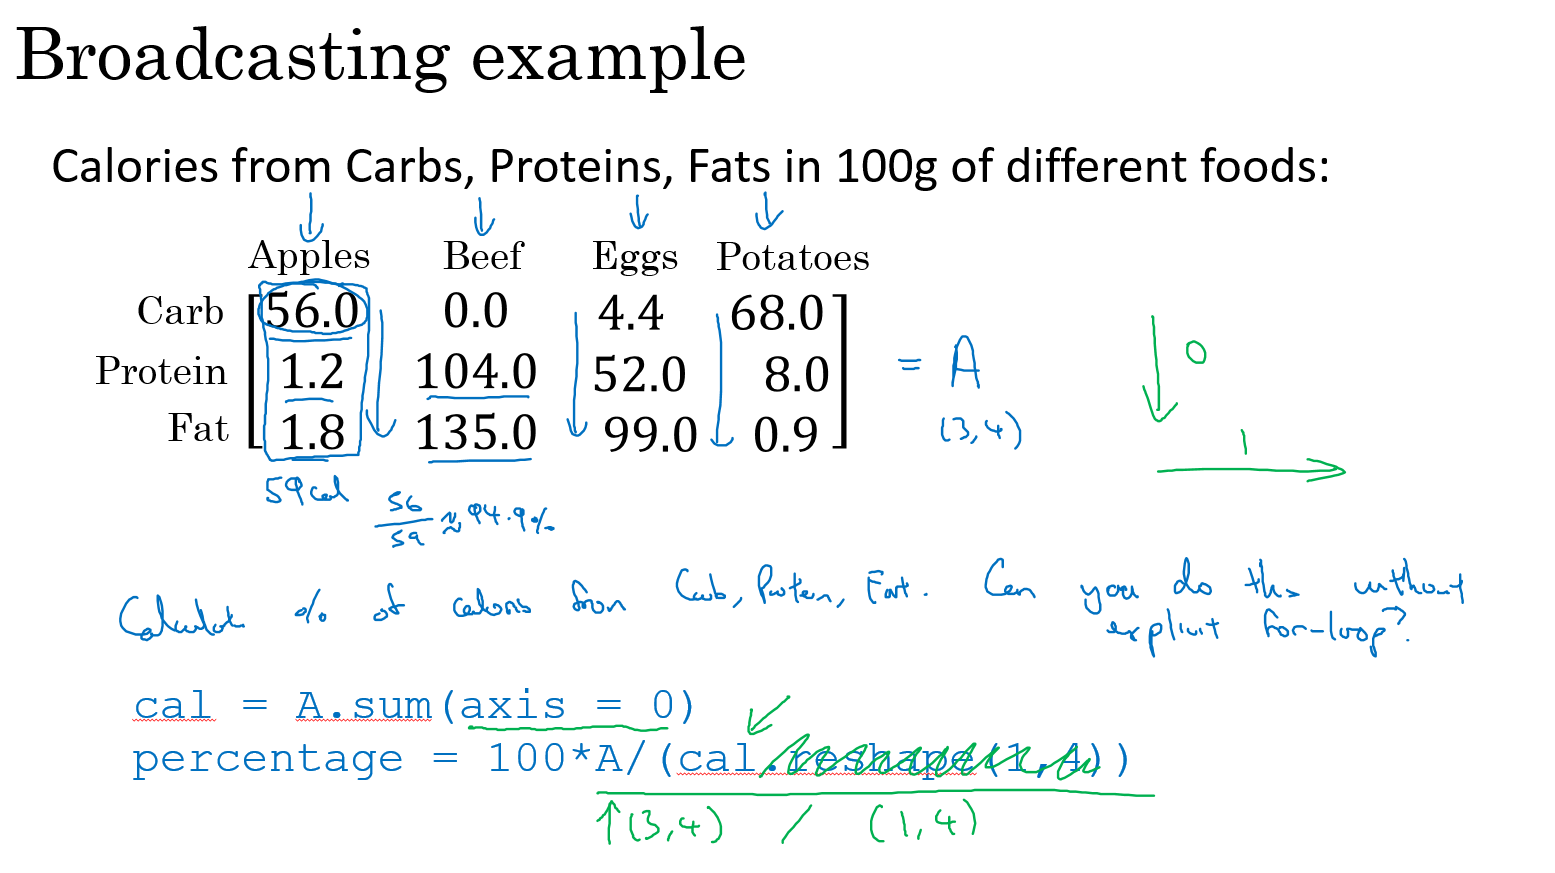

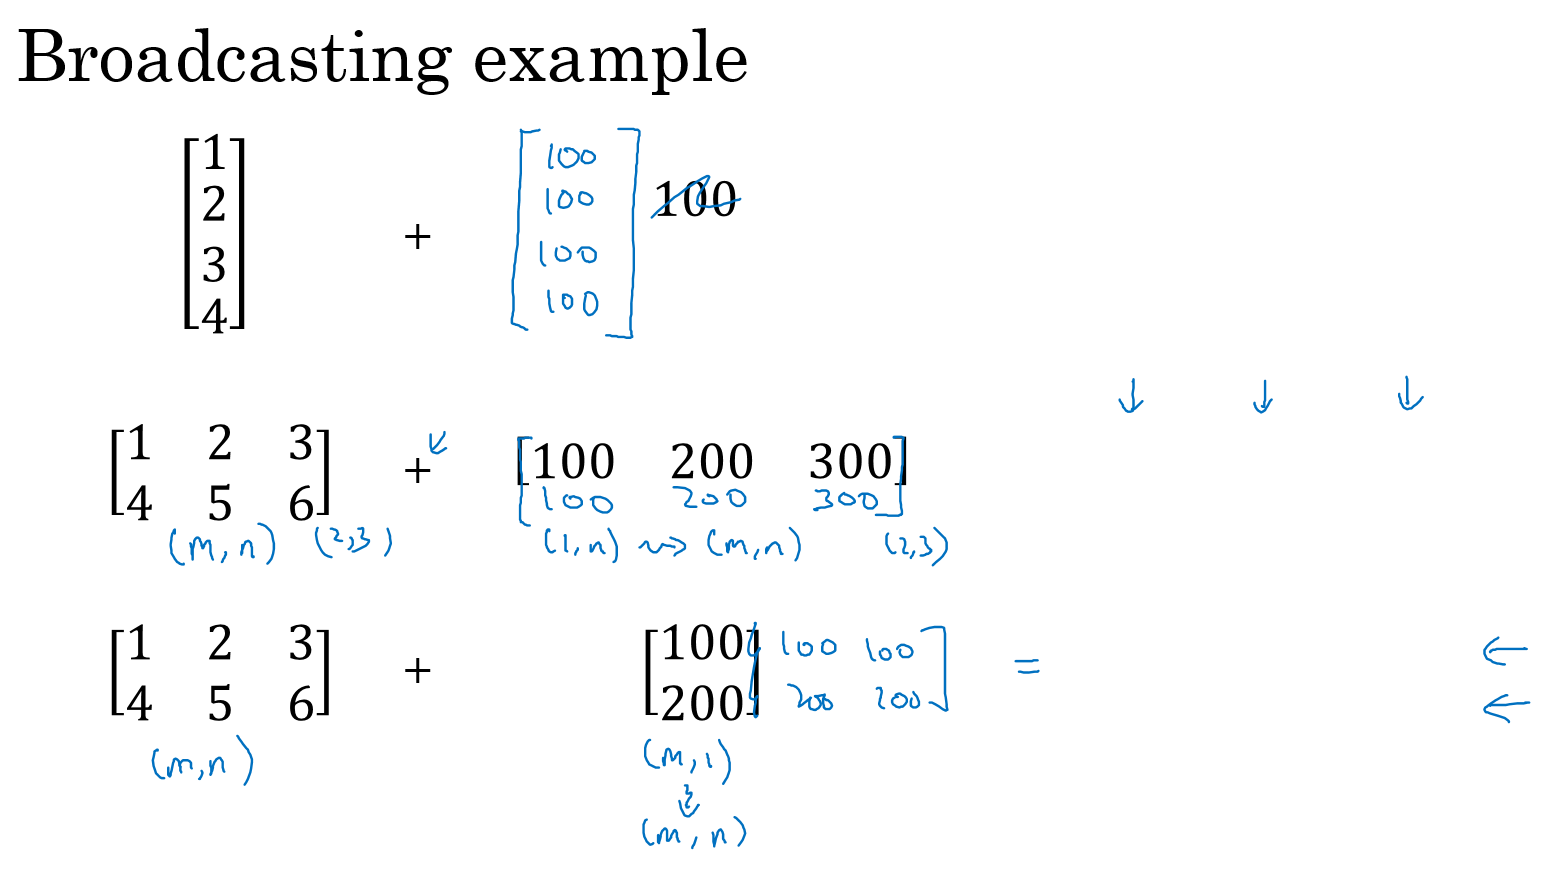

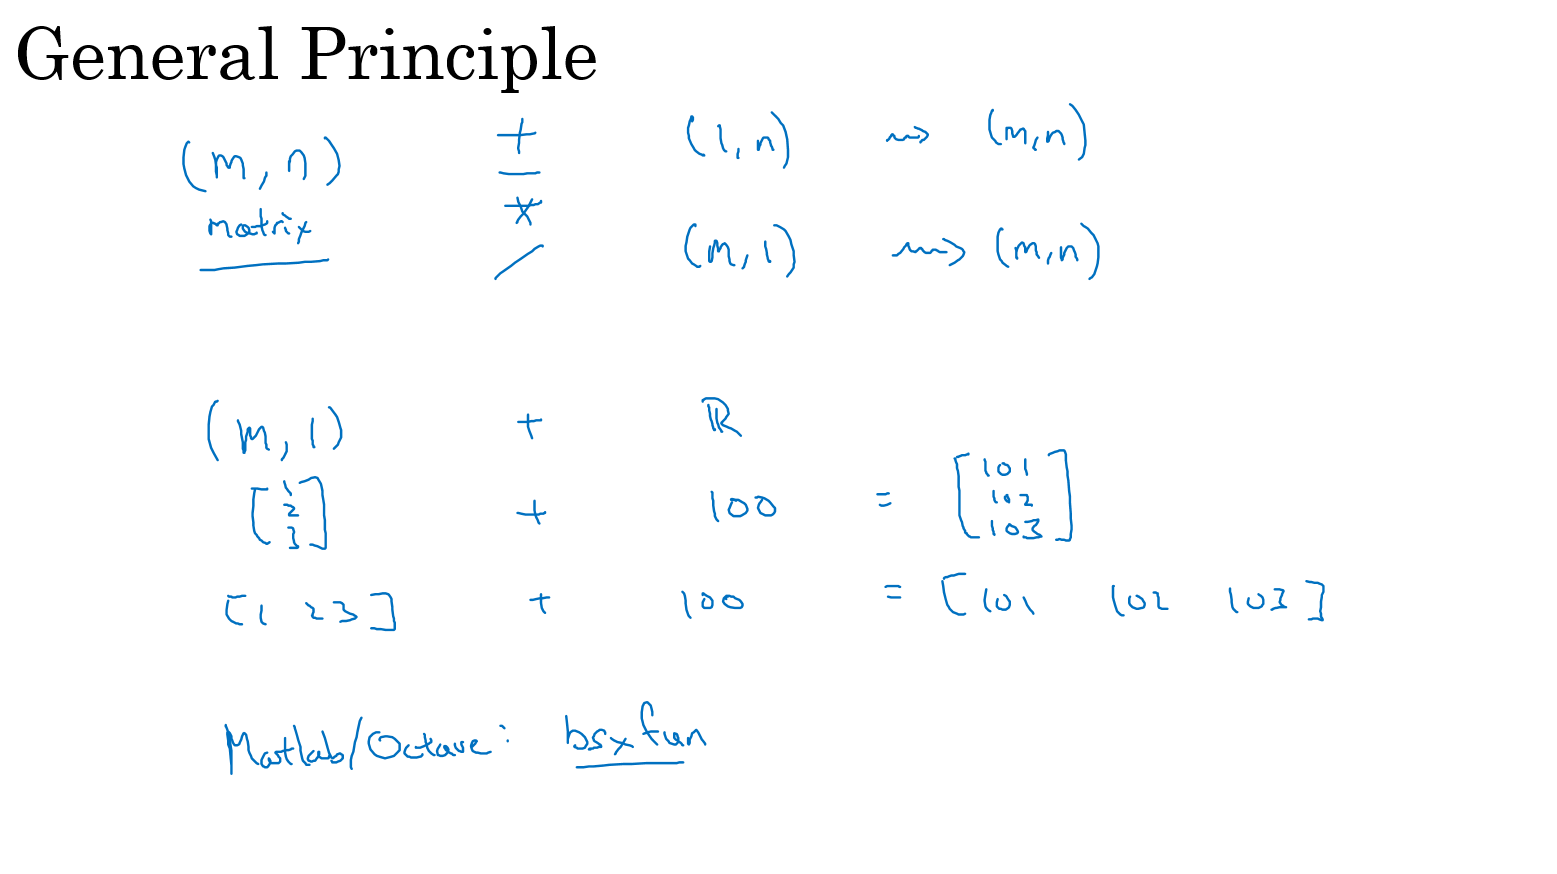

### A note on python/numpy vectors

.

### Quick tour of Jupyter/iPython Notebooks

.

### Explanation of logistic regression cost function (optional)

.

.

.